# • PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
!pip install tflearn

In [3]:

import numpy as np
import pandas as pd
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
x, y = oxflower17.load_data(one_hot=False)
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 1B. Print Number of images and shape of the images.

In [5]:
print(len(x))
print(len(y))
print(x.shape)
print(y.shape)
print(x)

1360
1360
(1360, 224, 224, 3)
(1360, 17)
[[[[0.09019608 0.10196079 0.07843138]
   [0.11372549 0.14509805 0.05098039]
   [0.09803922 0.16862746 0.00392157]
   ...
   [0.18039216 0.43137255 0.02352941]
   [0.14901961 0.40392157 0.        ]
   [0.15294118 0.4117647  0.00392157]]

  [[0.07450981 0.09019608 0.05882353]
   [0.08235294 0.12156863 0.03137255]
   [0.08627451 0.15686275 0.        ]
   ...
   [0.16470589 0.41960785 0.01176471]
   [0.14509805 0.40392157 0.        ]
   [0.15686275 0.41568628 0.        ]]

  [[0.05490196 0.08627451 0.04313726]
   [0.05490196 0.10196079 0.00784314]
   [0.08235294 0.15686275 0.        ]
   ...
   [0.16470589 0.42352942 0.01176471]
   [0.14901961 0.40784314 0.        ]
   [0.17254902 0.43137255 0.01176471]]

  ...

  [[0.08235294 0.17254902 0.        ]
   [0.08235294 0.16862746 0.        ]
   [0.07058824 0.15294118 0.        ]
   ...
   [0.09019608 0.22352941 0.02352941]
   [0.11372549 0.24705882 0.04313726]
   [0.14509805 0.2901961  0.07843138]]

  [[

In [6]:
df = pd.DataFrame( pd.Series([y], dtype=np.dtype("O")))
df= df.convert_dtypes()

# 1C. Print count of each class from y

In [7]:
Y=pd.DataFrame(y)
Y.value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16 
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    80
                                   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
               0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
                    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
                         0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
                              0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80
                                        0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0    80
                

# 2. Image Exploration & Transformation 
A. Display 5 random images.

[ 603 1016 1347 1275  578]


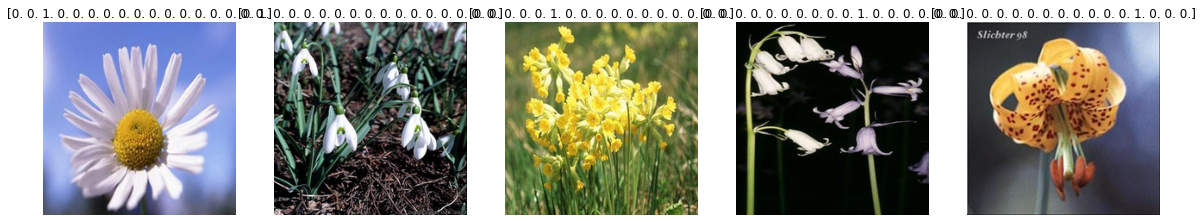

In [8]:
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(x), 5) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(x[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

# 2B. Select any image from the dataset and assign it to a variable. 

In [9]:
import random
import os
import cv2
# Original Image
img_org = random.choice(x)
img_org.shape


(224, 224, 3)

# 2C. Transform the image into grayscale format and display the same. 

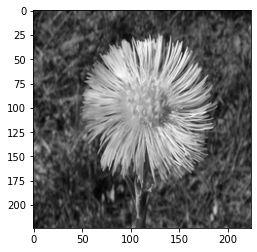

In [10]:
# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')

# 2D. Apply a filter to sharpen the image and display the image before and after sharpening.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


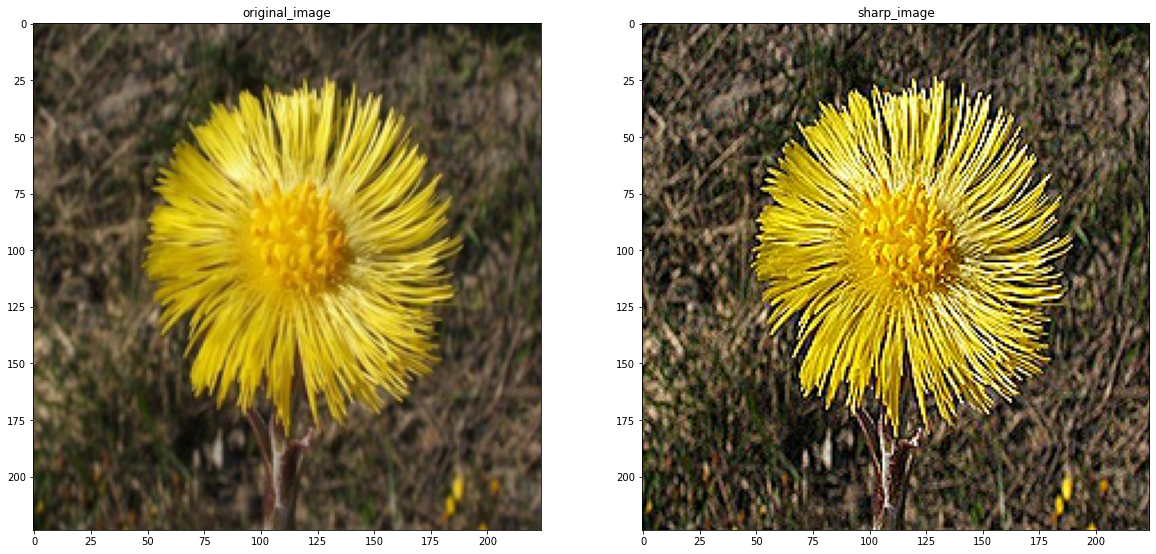

In [11]:
# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)
img_title = ['original_image', 'sharp_image']
plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, sharp_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img)


# 2E. Apply a filter to blur the image and display the image before and after blur. 

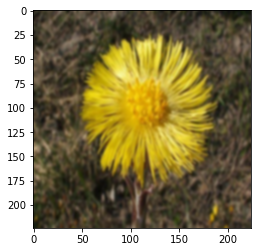

In [12]:
# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

plt.imshow(blur_img)

F. Display all the 4 images from above questions besides each other to observe the difference.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


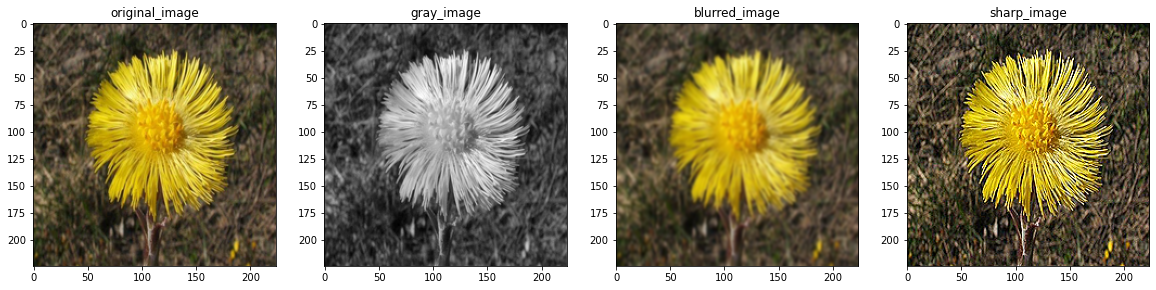

In [13]:
img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

# 3. Model training and Tuning: 
A. Split the data into train and test with 80:20 proportion

In [14]:
X = np.array(x)

print(X.shape, y.shape)
type(y)

(1360, 224, 224, 3) (1360, 17)


numpy.ndarray

In [15]:
x.shape
type(x)

numpy.ndarray

In [16]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = True)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(y_train))

(1088, 224, 224, 3)
(272, 224, 224, 3)
(1088, 17)
(272, 17)
<class 'numpy.ndarray'>


# 3 B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. 

In [18]:
X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], 150528) # 224*224*3 = 150528
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 150528)
X_test_ML = X_test_ML/255



In [19]:
decode_y_train=np.argmax(y_train,axis =1)

decode_y_test=np.argmax(y_test,axis =1)



In [20]:
# SVM - Model
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_ML, decode_y_train)

SVM_Accuracy=SVM.score(X_train_ML, decode_y_train)
print("Train Accuracy : ", SVM_Accuracy)



Train Accuracy :  0.9154411764705882


In [21]:
SVM_Accuracy=SVM.score(X_test_ML, decode_y_test)
print("Test Accuracy : ", SVM_Accuracy)

Test Accuracy :  0.5257352941176471


# 3C.Train a model using Neural Network and share performance metrics on test data. 

In [22]:
# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer

model.add(Dense(1024, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))

# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.sparse_categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\vrooky-montzo\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 150528)           602112    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                        

In [24]:
decode_y_train.shape
decode_y_test.shape

(272,)

In [25]:
histroy = model.fit(X_train_ML, decode_y_train ,validation_data =(X_test_ML,decode_y_test), epochs=10, batch_size=128, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 2.6957 - acc: 0.1608

C:\Users\vrooky-montzo\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 36s 33ms/sample - loss: 2.6957 - acc: 0.1608 - val_loss: 2.8177 - val_acc: 0.0294
Epoch 2/10
1088/1088 [==============================] - 29s 27ms/sample - loss: 2.1216 - acc: 0.3502 - val_loss: 2.8138 - val_acc: 0.0919
Epoch 3/10
1088/1088 [==============================] - 24s 22ms/sample - loss: 1.6740 - acc: 0.4807 - val_loss: 2.8458 - val_acc: 0.0772
Epoch 4/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 1.1918 - acc: 0.6388 - val_loss: 2.8578 - val_acc: 0.0735
Epoch 5/10
1088/1088 [==============================] - 21s 19ms/sample - loss: 0.7795 - acc: 0.7619 - val_loss: 2.8366 - val_acc: 0.0662
Epoch 6/10
1088/1088 [==============================] - 20s 19ms/sample - loss: 0.5478 - acc: 0.8465 - val_loss: 2.9660 - val_acc: 0.0625
Epoch 7/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.3500 - acc: 0.8961 - val_loss: 2.9730 - val_acc: 0.0625
Epoch 8/10
1088/1088 [=======================

# 3 D. Train a model using a basic CNN and share performance metrics on test data.

In [26]:
# Initialising the CNN classifier
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.4
classifier.add(Dropout(0.4))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
classifier.add(Dense(units = 17, activation = 'softmax'))

In [27]:
from tensorflow.keras.optimizers import RMSprop
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
classifier.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

C:\Users\vrooky-montzo\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [28]:
classifier.fit(X_train, decode_y_train, epochs = 50, validation_data = (X_test,decode_y_test),batch_size = 100)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 78s 71ms/sample - loss: 6.2462 - acc: 0.0735 - val_loss: 2.8317 - val_acc: 0.0588
Epoch 2/50
1088/1088 [==============================] - 67s 62ms/sample - loss: 2.6612 - acc: 0.1517 - val_loss: 2.6399 - val_acc: 0.1654
Epoch 3/50
1088/1088 [==============================] - 69s 63ms/sample - loss: 2.5571 - acc: 0.2050 - val_loss: 2.8767 - val_acc: 0.1765
Epoch 4/50
1088/1088 [==============================] - 69s 63ms/sample - loss: 2.1433 - acc: 0.3272 - val_loss: 2.0642 - val_acc: 0.3162
Epoch 5/50
1088/1088 [==============================] - 67s 62ms/sample - loss: 2.2113 - acc: 0.3575 - val_loss: 1.8659 - val_acc: 0.3713
Epoch 6/50
1088/1088 [==============================] - 62s 57ms/sample - loss: 1.4505 - acc: 0.5184 - val_loss: 1.6330 - val_acc: 0.4338
Epoch 7/50
1088/1088 [==============================] - 68s 62ms/sample - loss: 1.0568 - acc: 0.6618 - val_loss: 1.7960 - val

KeyboardInterrupt: 

In [ ]:
#the training procrss was taking too longand the model is an overfitting model,
#as seen from the train and validation accuracy.

# 3E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [29]:
# Predict the values from the validation dataset
Y_pred = classifier.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
print(Y_pred_classes[0])
print(Y_true[0])

C:\Users\vrooky-montzo\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


9
11


In [30]:
classifier.save('model.h5')

In [33]:
# predict the imageby the prediction.jpg'
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread("C:\\Users\\vrooky-montzo\\Downloads\\Prediction.jpg")
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

pred = classifier.predict(img)
pred_classes = np.argmax(pred,axis = 1)
print("The model predicts the passed image belongs to class,", pred_classes)

the model predicts the passed image belongs to class, [7]
